# Power in Resistive and Reactive AC circuits
### *Chapter 11 - Power Factor*

Consider the single-phase AC power system depicted below, with a $120\mathrm{V}\,60\mathrm{Hz}$ source driving a single $60\Omega$ resistive load.  

![single-phase-resistive-load](https://www.allaboutcircuits.com/uploads/articles/ac-source-drives-a-purely-resistive-load.png)

Via Ohm's Law,  

$$ I = \frac{120\mathrm{V}}{60\,\Omega} = 2\mathrm{A}$$

The current flowing through this circuit clocks in at $2\mathrm{A}$ [RMS](/notebooks/CircuitTheory/AlternatingCurrent/RootMeanSquared.ipynb).  The proof:

Via equation (1) in the root mean squared (RMS) chapter (linked to above), the RMS of the voltage running across the circuit ($E_\text{RMS}$) is given by:  

$$ E_\text{RMS} = 120\mathrm{V} = \sqrt{\frac{\int_0^L E^2 \, \mathrm{d}t}{L}}$$

Note that '$L$' denotes the half period of the driving (source) function and is given by:  

$$ L = \frac{1}{2f} = \frac{1}{120\mathrm{Hz}} \approxeq 8.33\mathrm{ms} $$

Via equation (1.b) in the RMS chapter,  

$$ E_\text{RMS} = R\cdot I_\text{RMS}$$  

$$ I_\text{RMS} = \frac{120\mathrm{V}}{60\,\Omega} = 2\mathrm{A}$$

Q.E.D.

In this example, the current to the load would be $2$ amps, RMS. The power dissipated at the load would be $240$ watts.

Because this load is purely resistive (no reactance), the current is in phase with the voltage, and calculations look similar to that in an equivalent DC circuit.

If we were to plot the voltage, current, and power waveforms for this circuit, it would look like the figure below.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

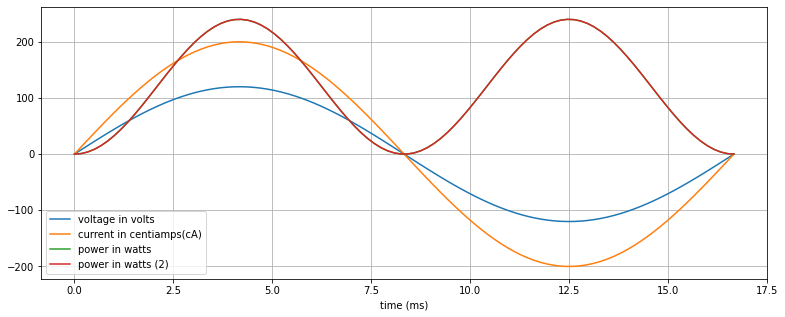

In [10]:
# Cyclic Waveform Properties.
f = 60
w = 2*np.pi*f
p = 1/f

# Create time domain that spans one period, denoted as 'p'.
t = np.linspace(0, p, num=100)

# Define the driving source function, denoted as 'E', current (I), and power (P).
E = 120*np.sin(w*t)
I = E/60
P = E*I
P2 = 120*(1 - np.cos(2*w*t))

# Create figure and axes objects.
fig, ax = plt.subplots(figsize=(13,5))
ax.set_xlabel('time (ms)')
ax.grid()

# Plot the E, I, and P over p seconds.
ax.plot(t*1000, E, label=r'voltage in volts')
ax.plot(t*1000, I*100, label='current in centiamps(cA)')
ax.plot(t*1000, P, label='power in watts')
ax.plot(t*1000, P2, label='power in watts (2)')
ax.legend()

Note that the waveform for power is always positive, never negative for this resistive circuit.

This means that power is always being dissipated by the resistive load, and never returned to the source as it is with reactive loads. If the source were a mechanical generator, it would take 240 watts worth of mechanical energy (about 1/3 horsepower) to turn the shaft.

Also, note that the waveform for power is not at the same frequency as the voltage or current! Rather, its frequency is double that of either the voltage or current waveforms.

This different frequency prohibits our expression of power in an AC circuit using the same complex (rectangular or polar) notation as used for voltage, current, and impedance because this form of mathematical symbolism implies unchanging phase relationships.

When frequencies are not the same, phase relationships constantly change.

As strange as it may seem, the best way to proceed with AC power calculations is to use scalar notation and to handle any relevant phase relationships with trigonometry.

# AC circuit with a Purely Reactive load

For comparison, let’s consider a simple AC circuit with a purely reactive load in the figure below.

![single-phase-reactive-load](https://www.allaboutcircuits.com/uploads/articles/ac-circuit-with-purely-reactive-load.png)

The impedance ($Z$) and reactance ($X$) of the load are given by:  

$$ X = 2\pi f L = 120\pi\mathrm{Hz} \cdot 0.160 \mathrm{H} =  19.2\pi \,\Omega$$

$$ Z = X\angle\,90^\circ$$

Via the generalized equation (1.b) in the RMS chapter,  

$$ I_\text{RMS} = \frac{E_\text{RMS}}{Z} = \frac{120\mathrm{V}}{19.2\pi\,\Omega}\angle\!-90^\circ = \frac{6.25}{\pi}\,\mathrm{A}\,\angle\!-90^\circ$$

In [9]:
1/(0.160*np.pi)

1.9894367886486917

Thus,  

$$ I_\text{RMS} \approxeq 1.99\mathrm{A}\,\angle\!-90^\circ$$

Below is a plot of the current, voltage, and power over time.

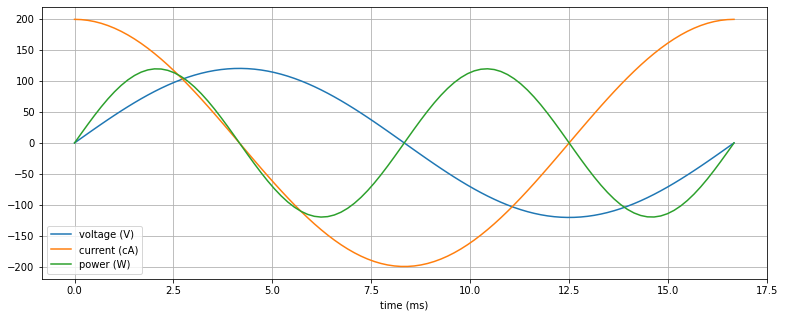

In [13]:
# Define Cyclic Wave Props.
f = 60
w = 2*np.pi*f
p = 1/f

# Create time domain over one period (p).
t = np.linspace(0, p, num=100)

# Define the driving function (E), current (I), and power (P).
E = 120*np.sin(w*t)
I = 1.99*np.cos(w*t)
P = E*I

# Create figure and axes objects.
fig, ax = plt.subplots(figsize=(13,5))
ax.set_xlabel('time (ms)')
ax.grid()

# Plot the circuit attributes, E, I, and P.
ax.plot(t*1000, E, label='voltage (V)')
ax.plot(t*1000, I*100, label='current (cA)')
ax.plot(t*1000, P, label='power (W)')
ax.legend()

Note that the power alternates equally between cycles of positive and negative. (Figure above) This means that power is being alternately absorbed from and returned to the source.

If the source were a mechanical generator, it would take (practically) no net mechanical energy to turn the shaft, because no power would be used by the load.

The generator shaft would be easy to spin, and the inductor would not become warm as a resistor would.

# AC circuit with a Resistive and Purely Reactive load

Now, let’s consider an AC circuit with a load consisting of both inductance and resistance in the figure below.

![single-phase-resistive-reactive](https://www.allaboutcircuits.com/uploads/articles/ac-circuit-with-both-reactance-and-resistance.png)

The reactance of the inductor and the total impedance of the circuit are given by:  

$$ X_\mathrm{L} = 120\pi\mathrm{Hz} \cdot 0.160\mathrm{H} = 19.2\pi\,\Omega$$

\begin{align*}
    Z &= (60+19.2\pi j)\,\Omega \\
     &\approxeq 85.08\,\Omega\,\angle\,45.15^\circ
\end{align*}     

And, the current is given by:  

$$ I = \frac{120\mathrm{V}}{Z} \approxeq 1.41\mathrm{A}\,\angle\!-45.15^\circ$$

In [15]:
120/85.08

1.4104372355430184

As for power:  

$$ P = IE \approxeq 120\mathrm{V}\,\sin(\omega t) \cdot 1.41\mathrm{A}\,\sin\big(\omega t - 45.15^\circ \big)$$

Via the above equation, equation (3) from the [Trigonometry](/notebooks/Math/Trigonometry.ipynb) notebook, and substitution,  

\begin{align*}
    P &\approxeq 120\mathrm{V}\cdot1.41\mathrm{A}\cdot\sin(\omega t) \,\big(\sin(\omega t)\,\cos45.15^\circ \:-\: \cos(\omega t)\,\sin45.15^\circ \big) \\
     &\approxeq 169.2\mathrm{W}\,\big(0.705\,\sin^2(\omega t) - 0.709\,\sin(\omega t)\cos(\omega t)\big) \\
     &\approxeq 169.2\mathrm{W}\,\big(0.705\,\sin^2(\omega t) - 0.354\,\sin(2\omega t)\big) \\
     &\approxeq 169.2\mathrm{W}\,\Big(0.353\,\big(1 - \cos(2\omega t)\big) \:-\:0.354\,\sin(2\omega t)\Big) 
\end{align*}     

In [17]:
def cos(deg: float) -> float:
    return np.cos(np.radians(deg))

def sin(deg: float) -> float:
    return np.sin(np.radians(deg))

In [21]:
cos(45.15)/2

0.3526265794308089

Thus,

$$ P \approxeq 59.73\mathrm{W}\,\big(1 - \sin\big(2\omega t + 90^\circ \big) - \sin(2\omega t)\big)$$

In [22]:
169.2*0.353

59.727599999999995

The Fourier Transform of $P$ has a dc component or level of $59.73\mathrm{W}$ and one harmonic that can be expressed as a complex number.  

$$H_1\approxeq -59.73\mathrm{W}\,(1 + j)= -59.73\mathrm{W}\sqrt{2}\,\angle\,45^\circ$$

In [28]:
-59.73*np.sqrt(2) + 59.73

-24.740976080544975

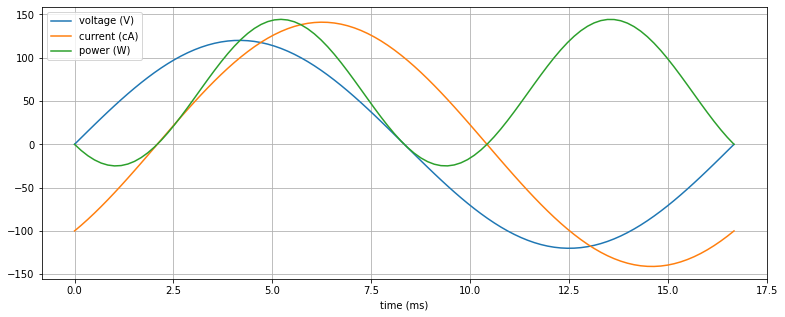

In [24]:
# Define the driving function (E), current (I), and power (P).
E = 120*np.sin(w*t)
I = 1.41*np.sin(w*t - np.radians(45.15))
P = E*I

# Create figure and axes objects.
fig, ax = plt.subplots(figsize=(13,5))
ax.set_xlabel('time (ms)')
ax.grid()

# Plot the circuit attributes, E, I, and P.
ax.plot(t*1000, E, label='voltage (V)')
ax.plot(t*1000, I*100, label='current (cA)')
ax.plot(t*1000, P, label='power (W)')
ax.legend()